<a href="https://colab.research.google.com/github/Marconiadsf/TechChallenger_2_Ibovespa/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Carregar os dados
df = pd.read_csv("FinalDataset.csv", sep=",")
df.head()

,Unnamed: 0,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Vol._sqrt,Tendencia,...,Ultimo_Fechamento_lag_3_dias,Variacao_Pct_lag_3_dias,Volume_lag_3_dias,Amplitude_Dia_lag_3_dias,Variacao_Abertura_Fechamento_lag_3_dias,Ultimo_Fechamento_lag_5_dias,Variacao_Pct_lag_5_dias,Volume_lag_5_dias,Amplitude_Dia_lag_5_dias,Variacao_Abertura_Fechamento_lag_5_dias
0,702,2023-01-11,112.517,110.816,112.552,110.752,14460000.0,0.0153,3802.630668,Alta,...,108.964,0.0123,12630000.0,1.791,1.322,105.334,0.0112,14450000.0,1.712,1.167
1,701,2023-01-12,111.850,112.516,113.129,110.982,19840000.0,-0.0059,4454.211490,Baixa,...,109.130,0.0015,12050000.0,1.804,0.166,107.641,0.0219,15510000.0,2.410,2.305
2,700,2023-01-13,110.916,111.843,111.847,110.428,15940000.0,-0.0084,3992.492956,Baixa,...,110.817,0.0155,13700000.0,2.715,1.688,108.964,0.0123,12630000.0,1.791,1.322
3,699,2023-01-16,109.213,110.908,110.908,108.753,12510000.0,-0.0154,3536.947837,Baixa,...,112.517,0.0153,14460000.0,1.800,1.701,109.130,0.0015,12050000.0,1.804,0.166
4,698,2023-01-17,111.439,109.214,111.577,109.214,14360000.0,0.0204,3789.459064,Alta,...,111.850,-0.0059,19840000.0,2.147,-0.666,110.817,0.0155,13700000.0,2.715,1.688


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               702 non-null    int64  
 1   Data                                     702 non-null    object 
 2   Último                                   702 non-null    float64
 3   Abertura                                 702 non-null    float64
 4   Máxima                                   702 non-null    float64
 5   Mínima                                   702 non-null    float64
 6   Vol.                                     702 non-null    float64
 7   Var%                                     702 non-null    float64
 8   Vol._sqrt                                702 non-null    float64
 9   Tendencia                                702 non-null    object 
 10  Target_Tendencia_Amanha                  702 non-n

In [4]:
# Identify categorical columns for one-hot encoding (excluding 'Data' and target variable)
categorical_cols = ['Tendencia', 'Tendencia_Dia_Anterior']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert the target variable 'Target_Tendencia_Amanha' into numerical labels
target_mapping = {'Baixa': 0, 'Estável': 1, 'Alta': 2}
df['Target_Tendencia_Amanha'] = df['Target_Tendencia_Amanha'].map(target_mapping)


# Display the first few rows of the DataFrame with new features
print("DataFrame after encoding categorical features and mapping target variable:")
display(df.head())

# Display DataFrame info to verify changes
print("\nInformações do DataFrame após o encoding:")
df.info()

print("\nFormato do DataFrame (linhas, colunas) após o encoding:")
print(df.shape)

DataFrame after encoding categorical features and mapping target variable:


,Unnamed: 0,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Vol._sqrt,Target_Tendencia_Amanha,...,Volume_lag_3_dias,Amplitude_Dia_lag_3_dias,Variacao_Abertura_Fechamento_lag_3_dias,Ultimo_Fechamento_lag_5_dias,Variacao_Pct_lag_5_dias,Volume_lag_5_dias,Amplitude_Dia_lag_5_dias,Variacao_Abertura_Fechamento_lag_5_dias,Tendencia_Baixa,Tendencia_Dia_Anterior_Baixa
0,702,2023-01-11,112.517,110.816,112.552,110.752,14460000.0,0.0153,3802.630668,0,...,12630000.0,1.791,1.322,105.334,0.0112,14450000.0,1.712,1.167,False,False
1,701,2023-01-12,111.850,112.516,113.129,110.982,19840000.0,-0.0059,4454.211490,0,...,12050000.0,1.804,0.166,107.641,0.0219,15510000.0,2.410,2.305,True,False
2,700,2023-01-13,110.916,111.843,111.847,110.428,15940000.0,-0.0084,3992.492956,0,...,13700000.0,2.715,1.688,108.964,0.0123,12630000.0,1.791,1.322,True,True
3,699,2023-01-16,109.213,110.908,110.908,108.753,12510000.0,-0.0154,3536.947837,2,...,14460000.0,1.800,1.701,109.130,0.0015,12050000.0,1.804,0.166,True,True
4,698,2023-01-17,111.439,109.214,111.577,109.214,14360000.0,0.0204,3789.459064,2,...,19840000.0,2.147,-0.666,110.817,0.0155,13700000.0,2.715,1.688,False,True



Informações do DataFrame após o encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               702 non-null    int64  
 1   Data                                     702 non-null    object 
 2   Último                                   702 non-null    float64
 3   Abertura                                 702 non-null    float64
 4   Máxima                                   702 non-null    float64
 5   Mínima                                   702 non-null    float64
 6   Vol.                                     702 non-null    float64
 7   Var%                                     702 non-null    float64
 8   Vol._sqrt                                702 non-null    float64
 9   Target_Tendencia_Amanha                  702 non-null    int64  
 10  Amplitu

In [5]:
# Separar features (X) e a variável alvo (y)
# Excluir a coluna 'Data' e 'Vol._sqrt' que foram usadas para tratamento/visualização e não são features para o modelo diretamente.
# Excluir também a coluna 'Vol.' e 'Var%' se as versões transformadas já existirem e forem preferidas,
# mas neste caso, as transformações geraram novas colunas, então as originais podem ser mantidas como features.

X = df.drop(columns=['Data', 'Target_Tendencia_Amanha', 'Vol._sqrt'])
y = df['Target_Tendencia_Amanha']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (702, 46)
Target (y) shape: (702,)


In [6]:
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data').reset_index(drop=True)

print("Coluna 'Data' convertida para datetime e DataFrame ordenado.")
display(df.head())


Coluna 'Data' convertida para datetime e DataFrame ordenado.


,Unnamed: 0,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Vol._sqrt,Target_Tendencia_Amanha,...,Volume_lag_3_dias,Amplitude_Dia_lag_3_dias,Variacao_Abertura_Fechamento_lag_3_dias,Ultimo_Fechamento_lag_5_dias,Variacao_Pct_lag_5_dias,Volume_lag_5_dias,Amplitude_Dia_lag_5_dias,Variacao_Abertura_Fechamento_lag_5_dias,Tendencia_Baixa,Tendencia_Dia_Anterior_Baixa
0,702,2023-01-11,112.517,110.816,112.552,110.752,14460000.0,0.0153,3802.630668,0,...,12630000.0,1.791,1.322,105.334,0.0112,14450000.0,1.712,1.167,False,False
1,701,2023-01-12,111.850,112.516,113.129,110.982,19840000.0,-0.0059,4454.211490,0,...,12050000.0,1.804,0.166,107.641,0.0219,15510000.0,2.410,2.305,True,False
2,700,2023-01-13,110.916,111.843,111.847,110.428,15940000.0,-0.0084,3992.492956,0,...,13700000.0,2.715,1.688,108.964,0.0123,12630000.0,1.791,1.322,True,True
3,699,2023-01-16,109.213,110.908,110.908,108.753,12510000.0,-0.0154,3536.947837,2,...,14460000.0,1.800,1.701,109.130,0.0015,12050000.0,1.804,0.166,True,True
4,698,2023-01-17,111.439,109.214,111.577,109.214,14360000.0,0.0204,3789.459064,2,...,19840000.0,2.147,-0.666,110.817,0.0155,13700000.0,2.715,1.688,False,True


**Reasoning**:
Now that the DataFrame is sorted by date, I need to define the split point for the time-based train-test split. This involves calculating the index corresponding to the last 30 days of data to separate the training and testing sets chronologically.



In [7]:
test_size_days = 30
split_date = df['Data'].max() - pd.Timedelta(days=test_size_days)

df_train = df[df['Data'] <= split_date]
df_test = df[df['Data'] > split_date]

# Separate features (X) and target (y) for time-based split
X_train_time = df_train.drop(columns=['Data', 'Target_Tendencia_Amanha', 'Vol._sqrt'])
y_train_time = df_train['Target_Tendencia_Amanha']
X_test_time = df_test.drop(columns=['Data', 'Target_Tendencia_Amanha', 'Vol._sqrt'])
y_test_time = df_test['Target_Tendencia_Amanha']

print(f"DataFrame divided based on the last {test_size_days} days for testing.")
print(f"Training set starts from {df_train['Data'].min().strftime('%Y-%m-%d')} to {df_train['Data'].max().strftime('%Y-%m-%d')}. Shape: {df_train.shape}")
print(f"Test set starts from {df_test['Data'].min().strftime('%Y-%m-%d')} to {df_test['Data'].max().strftime('%Y-%m-%d')}. Shape: {df_test.shape}")
print(f"X_train_time shape: {X_train_time.shape}")
print(f"y_train_time shape: {y_train_time.shape}")
print(f"X_test_time shape: {X_test_time.shape}")
print(f"y_test_time shape: {y_test_time.shape}")

DataFrame divided based on the last 30 days for testing.
Training set starts from 2023-01-11 to 2025-09-30. Shape: (680, 49)
Test set starts from 2025-10-01 to 2025-10-30. Shape: (22, 49)
X_train_time shape: (680, 46)
y_train_time shape: (680,)
X_test_time shape: (22, 46)
y_test_time shape: (22,)


**Reasoning**:
Now that the data is split chronologically, I need to select the top 20 features from the time-based training and testing sets, then retrain the Random Forest model and evaluate its performance with this new split.



Selected Top 20 Features: ['Amplitude_Dia_lag_3_dias', 'RSI', 'Volume_lag_1_dia', 'Variacao_Abertura_Fechamento_lag_5_dias', 'Volume_lag_2_dias', 'Amplitude_Dia', 'Variacao_Pct_lag_5_dias', 'Amplitude_Dia_lag_2_dias', 'Variacao_Pct_Volume', 'Diff_Normalizada_MM20', 'ATR', 'Amplitude_Dia_lag_5_dias', 'Vol.', 'MACD', 'Volume_lag_3_dias', 'Variacao_Abertura_Fechamento_lag_2_dias', 'Variacao_Pct_lag_3_dias', 'Unnamed: 0', 'Amplitude_Dia_lag_1_dia', 'MACD_Signal']
X_train_time_top20 shape: (680, 20)
X_test_time_top20 shape: (22, 20)

Random Forest model (Top 20 Features, Time-based Split) trained successfully.

Accuracy of Random Forest (Top 20 Features, Time-based Split): 0.5909


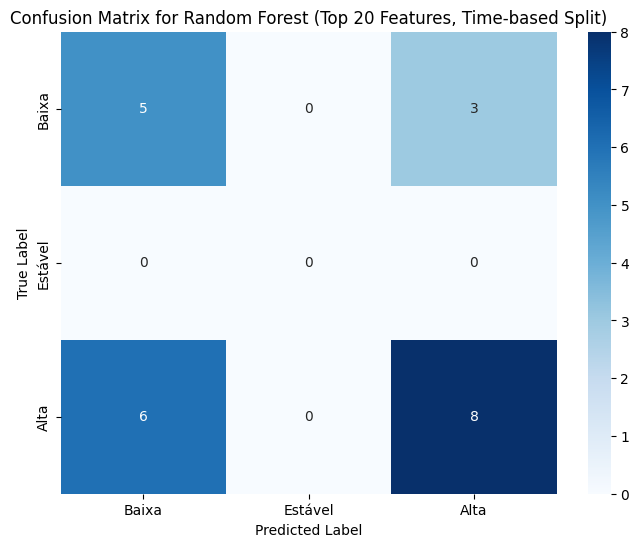


Classification Report for Random Forest (Top 20 Features, Time-based Split):
              precision    recall  f1-score   support

       Baixa       0.45      0.62      0.53         8
        Alta       0.73      0.57      0.64        14

    accuracy                           0.59        22
   macro avg       0.59      0.60      0.58        22
weighted avg       0.63      0.59      0.60        22



In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the top 20 features (assuming 'feature_importances' is available from previous steps)
# Ensure 'top_20_features' is defined, if not, re-run feature importance calculation or define it.
# For safety, let's redefine it based on the earlier calculation result if not in scope.
if 'feature_importances' not in locals() or feature_importances.empty:
    # This part should ideally not run if previous steps were successful.
    # If it runs, it means feature_importances was not correctly passed.
    print("Warning: 'feature_importances' not found. Re-calculating using a placeholder RF model.")
    rf_placeholder = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_placeholder.fit(X, y) # Use full data for placeholder importance if X_train was not saved with column names
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_placeholder.feature_importances_
    }).sort_values(by='importance', ascending=False)

top_20_features = feature_importances['feature'].head(20).tolist()

# 2. Select these top 20 features from X_train_time and X_test_time
X_train_time_top20 = X_train_time[top_20_features]
X_test_time_top20 = X_test_time[top_20_features]

print(f"Selected Top 20 Features: {top_20_features}")
print(f"X_train_time_top20 shape: {X_train_time_top20.shape}")
print(f"X_test_time_top20 shape: {X_test_time_top20.shape}")

# 3. Retrain the Random Forest model with these selected features and time-based split
rf_model_time_top20 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_time_top20.fit(X_train_time_top20, y_train_time)

print("\nRandom Forest model (Top 20 Features, Time-based Split) trained successfully.")

# 4. Predict on the time-based test set
y_pred_time_top20 = rf_model_time_top20.predict(X_test_time_top20)

# 5. Calculate and display the accuracy
accuracy_time_top20 = accuracy_score(y_test_time, y_pred_time_top20)
print(f"\nAccuracy of Random Forest (Top 20 Features, Time-based Split): {accuracy_time_top20:.4f}")

# Map numerical labels back to original string names for better interpretation
# Assuming reverse_target_mapping is available from previous steps
if 'reverse_target_mapping' not in locals():
    target_mapping = {'Baixa': 0, 'Estável': 1, 'Alta': 2}
    reverse_target_mapping = {v: k for k, v in target_mapping.items()}

# Get unique labels from y_test_time to correctly define target_names and labels for the report
actual_labels_time = np.unique(y_test_time)
actual_target_names_time = [reverse_target_mapping[label] for label in actual_labels_time]

# Ensure all classes are represented in confusion matrix labels, even if not in actual_labels_time
all_class_labels = sorted(list(target_mapping.values()))
all_class_names = [reverse_target_mapping[label] for label in all_class_labels]

# 6. Generate and display the confusion matrix
cm_time_top20 = confusion_matrix(y_test_time, y_pred_time_top20, labels=all_class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_time_top20, annot=True, fmt='d', cmap='Blues',
            xticklabels=all_class_names,
            yticklabels=all_class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest (Top 20 Features, Time-based Split)')
plt.show()

# 7. Display a classification report
print("\nClassification Report for Random Forest (Top 20 Features, Time-based Split):")
print(classification_report(y_test_time, y_pred_time_top20, labels=actual_labels_time, target_names=actual_target_names_time))
